## load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
data_path = '../data/heart_disease.csv'

df = pd.read_csv(data_path)

NUMERIC_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
CATEGORICAL_COLS = [f for f in df.columns if f not in NUMERIC_COLS]

df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,thal_6,thal_7
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,0,0,0,0,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,1,0,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,1,0,0,1,0,1,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,0,0,1,0,0,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,0,1,0,0,0,1,0,0


In [4]:
# split the data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# scale the numeric data
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[NUMERIC_COLS] = scaler.fit_transform(X_train[NUMERIC_COLS])
X_test_scaled[NUMERIC_COLS] = scaler.transform(X_test[NUMERIC_COLS])

## Principle Component Analysis

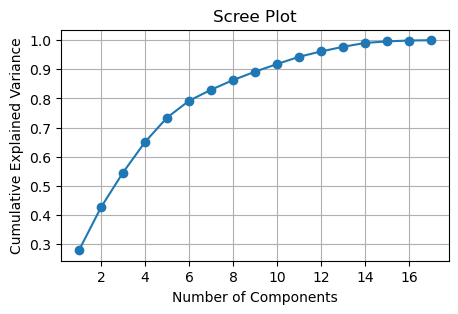

In [6]:
# pca to select top features
pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(5,3))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),\
         np.cumsum(pca_full.explained_variance_ratio_),\
        marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

- The data is **non-linear** since it needs more than **3 components** to explain variance of more than **80%** of the data
- The best number of components is **14**

In [7]:
# pca dataset
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
pca_df = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [9]:
pca_df.shape

(303, 12)

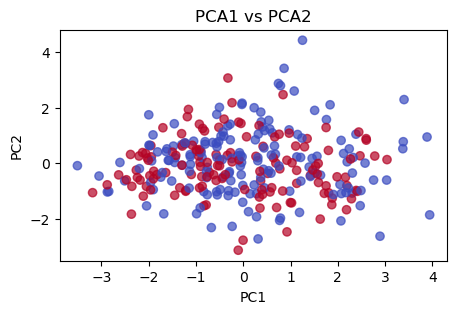

In [10]:
# plot the first two components of PCA dataset
plt.figure(figsize=(5,3))
plt.scatter(pca_df[:,0], pca_df[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA1 vs PCA2")
plt.show()